this notebook does some spot checking on learned weight patterns in `scripts/training/yuanyuan_8k_a_3day/feature_approximation/local_pcn_recurrent/submit_sep2.py`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from thesis_v2 import dir_dict
from thesis_v2.training.training_aux import load_training_results

In [3]:
from sys import path
from os.path import join, exists, dirname
from os import makedirs



In [4]:
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20200208 as param_iterator_obj,
    keygen
)

In [5]:
from numpy.linalg import norm
import numpy as np

In [6]:
from pickle import load

In [7]:
def load_one_result(filename):
    with open(filename, 'rb') as f:
        return load(f)

In [8]:
# create dir
global_vars = {
    'save_dir': join(dir_dict['analyses'],
                     'scripts+yuanyuan_8k_a_3day+maskcnn_polished_with_rcnn_k_bl+20200208',
                    'pca')
}

In [9]:
from math import sqrt
from torchvision.utils import make_grid
from torch import tensor

In [10]:
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(
    ('042318', '043018','051018',))
                           )
assert cc_max_all_neurons.shape == (79,)

In [11]:
def do_analysis(label_fname_list):
    for label, fname in label_fname_list:
        print(label)
        data = load_one_result(fname)
#         for x, y in data.items():
#             print(x, y.dtype, y.shape)
            
        
        # ok. what to show here?
        # first, let's reshape `components`.
        components = data['components']
        assert components.ndim == 2
        n_el_per_filter = components.shape[1]
        kernel_size = round(sqrt(n_el_per_filter))
        assert type(kernel_size) is int and kernel_size**2 == n_el_per_filter
        components = components.reshape(components.shape[0], 1, kernel_size, kernel_size)
        
        # this components is ready to be displayed using pytorch's util
        components_grid = make_grid(tensor(components[:20]), nrow=10,normalize=True, scale_each=True)
        components_grid = components_grid.numpy().transpose(1, 2, 0)
        print(np.cumsum(data['explained_variance_ratio'])[:20])
        plt.close('all')
        plt.figure(figsize=(8,6))
        plt.imshow(components_grid,vmin=0.0,vmax=1.0,interpolation='none')
        plt.show()
        

In [12]:
def collect_all(cls_set):
    save_dir = global_vars['save_dir']
    count = 0
    
    for idx, param in enumerate(param_iterator_obj().generate()):
        
        if param['rcnn_bl_cls'] not in cls_set:
            # ignore cls=1,2 models.
            continue
    
    
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        result = load_training_results(key, return_model=False, return_checkpoint=True)
        cc_raw = np.asarray(result['stats_best']['stats']['test']['corr'])
        assert cc_raw.shape == (79,)
        # load loss curve to make sure we are good in approximation.
        corr_test = ((cc_raw/cc_max_all_neurons)**2).mean()
        # only keep 0.6+ models
        if corr_test < 0.6:
            continue
        
        count += 1
        
        
        def filename_gen(x):
            return join(save_dir, f'{idx}/unit_norm', f'{x}.pkl')
        
        filename_set = {'ff', 'lateral'}
        if not all([exists(filename_gen(x)) for x in filename_set]):
            # right now if partially done, the partial results will be fully overwritten.
            continue
            raise RuntimeError('bug!')
        
        # show some results.
        verbose = count % 5 == 0
        
        if verbose:
            print(count, key, corr_test)
            
            # load lateral one
            do_analysis([(x, filename_gen(x)) for x in [
                'lateral','ff',
                # remove this, confusing.
#                 'all'
            ]
                        ])
        
        
    print(count)


5 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se0 0.6085307046872813
lateral
[0.12958193 0.2327688  0.32677334 0.40932506 0.48011748 0.53982181
 0.59609918 0.64490657 0.68317927 0.7142857  0.74260168 0.76926557
 0.79182091 0.81179414 0.8276659  0.8432432  0.85747538 0.86973109
 0.88128222 0.89143074]


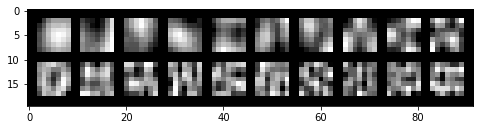

ff
[0.2702734  0.49971459 0.62167138 0.72441824 0.80419501 0.86884329
 0.91612296 0.93953879 0.95951598 0.97703774 0.98930996 0.99586665
 0.99820375 0.99959202 1.         1.        ]


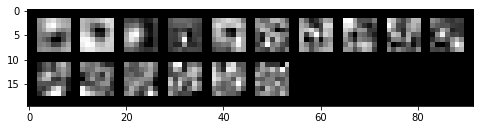

10 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se0 0.6289122524393399
lateral
[0.14637641 0.26631033 0.36728562 0.4623876  0.53186806 0.59221357
 0.63815106 0.68177187 0.71405435 0.74026167 0.76311962 0.78439416
 0.80458783 0.81700341 0.82773633 0.83753644 0.84691574 0.85497241
 0.86197878 0.86787682]


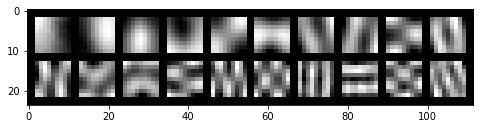

ff
[0.18632315 0.34216003 0.47642723 0.57724975 0.66009255 0.72109255
 0.77282177 0.8110223  0.84278909 0.87349924 0.89678233 0.9165987
 0.93494213 0.94864536 0.96059843 0.97069309 0.97815723 0.98439375
 0.98885981 0.99200316]


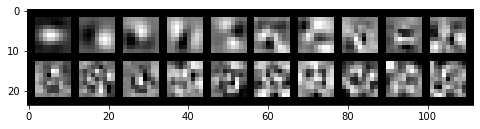

15 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l113/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se0 0.6013120379155321
lateral
[0.13349109 0.23186716 0.32078985 0.39860533 0.46863173 0.52647333
 0.57450015 0.61899978 0.65596479 0.68344768 0.70947465 0.73435288
 0.75794864 0.77557854 0.78952753 0.80239048 0.81485791 0.82657456
 0.83797867 0.8457352 ]


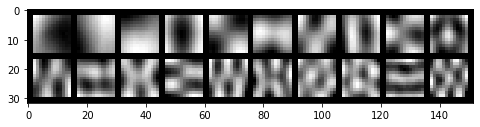

ff
[0.17737568 0.30186268 0.39758126 0.48507646 0.55034903 0.60990494
 0.66057801 0.70210014 0.73792069 0.77040126 0.80139736 0.82922222
 0.85363801 0.8758673  0.89642351 0.91304692 0.92859047 0.93998889
 0.94939361 0.95773684]


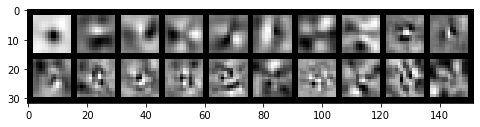

20 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6196973916768042
lateral
[0.18968996 0.31543522 0.42310518 0.50866736 0.57656124 0.62418686
 0.66683821 0.70740971 0.73922132 0.76364837 0.78684736 0.80632521
 0.82441587 0.83771565 0.85043011 0.86197316 0.87231861 0.8821688
 0.890727   0.89873129]


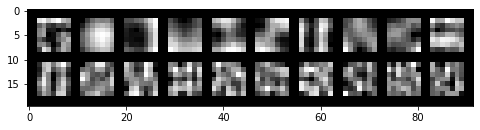

ff
[0.2411712  0.43368457 0.61860015 0.71183671 0.78486209 0.84580649
 0.90141612 0.93772316 0.95934048 0.97666836 0.98560416 0.99276039
 0.996845   0.999281   1.         1.        ]


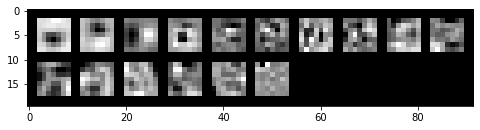

25 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.656897971874631
lateral
[0.16893084 0.29385384 0.40825933 0.50488953 0.57504568 0.63910415
 0.68729966 0.72968745 0.76409876 0.78908255 0.81263781 0.83291831
 0.85035288 0.86331595 0.8723588  0.88092871 0.88906915 0.8965125
 0.90331072 0.90802951]


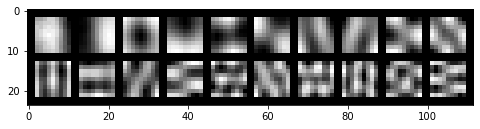

ff
[0.24136462 0.39701329 0.51699064 0.6120712  0.69519855 0.77229979
 0.80894793 0.84097255 0.86883437 0.8932327  0.91564144 0.93275388
 0.94922464 0.96356476 0.97417579 0.98215235 0.98746118 0.99085249
 0.99377221 0.99540248]


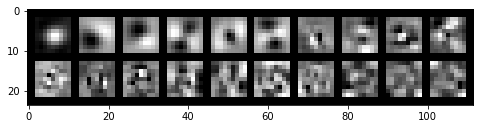

30 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.6290359745041194
lateral
[0.18650098 0.31809885 0.42568661 0.52589938 0.59438488 0.65471877
 0.69143222 0.72683805 0.75296223 0.77240786 0.78952912 0.80366437
 0.81638149 0.82708774 0.83481101 0.84160388 0.84795827 0.85369815
 0.85872819 0.86323221]


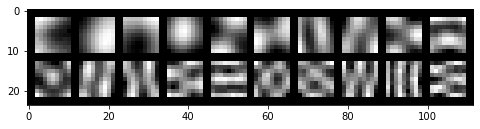

ff
[0.24439175 0.40892315 0.53599182 0.62635645 0.70977058 0.78287096
 0.82351689 0.85582329 0.88170214 0.90514781 0.92603125 0.94484376
 0.9607294  0.97182986 0.98234769 0.98794001 0.99219778 0.99514834
 0.99704509 0.99792554]


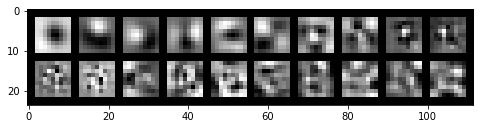

35 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se0 0.6008843318558483
lateral
[0.21377158 0.34892447 0.4475134  0.53089759 0.59072042 0.63988028
 0.68436432 0.72128953 0.75205343 0.77840696 0.80175388 0.82356557
 0.8427084  0.85826111 0.87050184 0.88162894 0.89104073 0.89967649
 0.90667381 0.91352796]


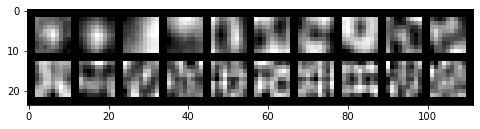

ff
[0.25887176 0.41552234 0.55898058 0.66737164 0.74805504 0.80418758
 0.85506811 0.89232576 0.92729192 0.95419408 0.97555395 0.98624247
 0.99452572 0.99774761 1.         1.        ]


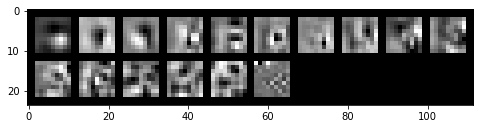

40 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se0 0.6582923972179284
lateral
[0.23209568 0.37030427 0.48488115 0.59126342 0.65442165 0.71424403
 0.75399592 0.78994155 0.81689402 0.84050769 0.8595999  0.87618894
 0.8904257  0.90111613 0.90915452 0.91565118 0.92202468 0.9277062
 0.93318123 0.93772012]


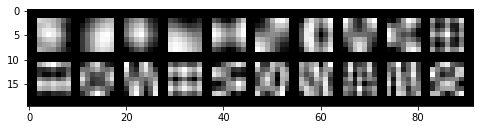

ff
[0.34369965 0.52466019 0.68729937 0.76580232 0.81425221 0.85703267
 0.88741605 0.91032657 0.93219427 0.95152431 0.96529881 0.977826
 0.98626269 0.9916581  0.99441218 0.99652725 0.99782177 0.99868054
 0.99917622 0.99955226]


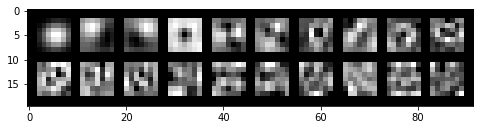

45 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se0 0.6530254817139657
lateral
[0.20095405 0.35324147 0.46944692 0.57732965 0.64650564 0.70774734
 0.75067536 0.7851591  0.80954745 0.83156422 0.85179466 0.86590318
 0.87976846 0.88887662 0.89621663 0.90259039 0.90870692 0.91436285
 0.91954706 0.92419965]


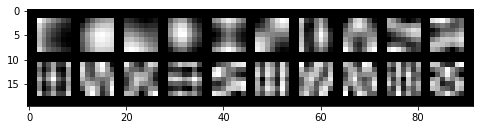

ff
[0.44030978 0.60643854 0.75918896 0.8278021  0.87109742 0.90497189
 0.92763335 0.95009561 0.96833595 0.97918193 0.98636269 0.99203094
 0.99614629 0.99784864 0.99870764 0.99922481 0.99960229 0.99975753
 0.99985954 0.99992412]


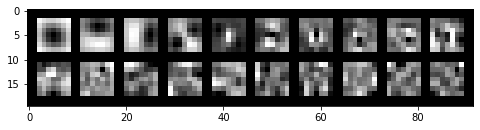

50 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.6390132471843323
lateral
[0.20206971 0.37421094 0.46644659 0.54645205 0.62358867 0.67619066
 0.71807797 0.75353344 0.78179955 0.80923223 0.83193445 0.85190854
 0.86784703 0.88120942 0.89270051 0.90307741 0.91205148 0.91983725
 0.92742689 0.93466797]


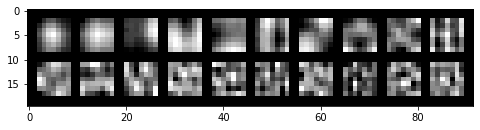

ff
[0.28544033 0.50439914 0.64352354 0.76218986 0.8300791  0.8924482
 0.93127682 0.96032247 0.97385658 0.98585637 0.99245041 0.99685681
 0.99848025 0.99979107 1.         1.        ]


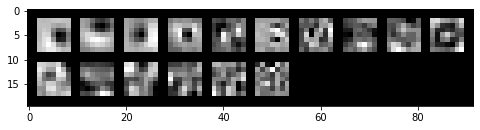

55 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6424822815647215
lateral
[0.14603957 0.28064637 0.37086435 0.44672552 0.50944335 0.56310867
 0.61089599 0.65461909 0.69238727 0.72270806 0.75238179 0.77840111
 0.80228312 0.81929748 0.83439312 0.8481086  0.86096008 0.87248556
 0.88210763 0.89112607]


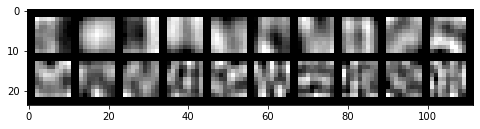

ff
[0.30240865 0.47344551 0.58369152 0.6879581  0.76554927 0.83196566
 0.88752278 0.92499239 0.95634788 0.97438156 0.98466771 0.99147391
 0.99543613 0.9983977  1.         1.        ]


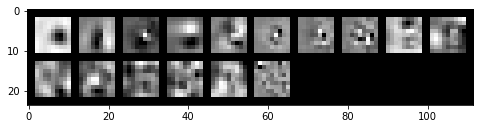

60 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6605917151414636
lateral
[0.25724377 0.40863362 0.52967471 0.62298805 0.68244589 0.72651654
 0.76067889 0.78215019 0.80288005 0.82014095 0.83522598 0.84887559
 0.85861993 0.86768368 0.8756796  0.88290117 0.88951239 0.89497091
 0.89996496 0.90472936]


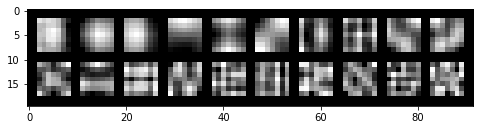

ff
[0.37468323 0.58684834 0.74165086 0.82140046 0.86699822 0.9125711
 0.93655819 0.9566429  0.97006325 0.98136722 0.98655083 0.99016176
 0.99291187 0.99534574 0.99712736 0.99869807 0.99941039 0.99977247
 0.999901   0.99993819]


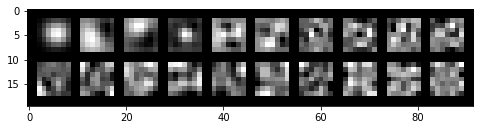

65 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6807729006596479
lateral
[0.18388882 0.31916248 0.44646092 0.55960035 0.63203257 0.69834804
 0.73757896 0.77348085 0.80309834 0.82998126 0.85081035 0.86809296
 0.88325098 0.89397922 0.90365126 0.91182975 0.91857042 0.92466203
 0.93070063 0.93557778]


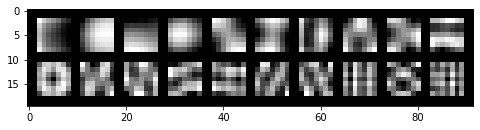

ff
[0.39140531 0.58314348 0.75946594 0.81911596 0.86943945 0.90909815
 0.93531852 0.95711297 0.97254901 0.98179016 0.989329   0.99414545
 0.99678091 0.99811381 0.99904526 0.99952027 0.99972532 0.99981863
 0.99988244 0.99991919]


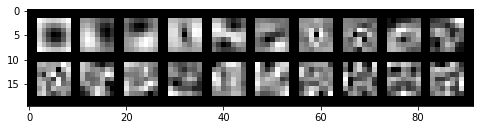

70 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l113/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6303894706768132
lateral
[0.1501021  0.26515008 0.35610521 0.43443183 0.49420392 0.54726761
 0.59090607 0.62895071 0.6608205  0.68896008 0.71572279 0.73892333
 0.76026729 0.77606418 0.79000982 0.80358707 0.81599923 0.82739121
 0.83811255 0.84790502]


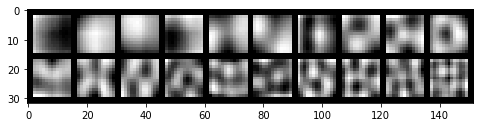

ff
[0.27349794 0.42112898 0.50639513 0.58395085 0.65465855 0.72150902
 0.76147738 0.7997864  0.83142754 0.86167452 0.88493629 0.90670337
 0.92569406 0.94267795 0.95681851 0.96950616 0.97568485 0.98089773
 0.98524146 0.98829319]


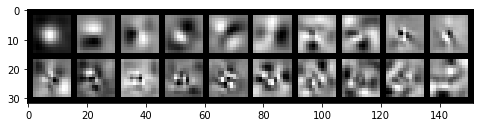

75 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se1 0.615127130493618
lateral
[0.14714334 0.26719107 0.3747764  0.46739365 0.54056987 0.60838933
 0.66096804 0.70812186 0.74127651 0.77057086 0.79355372 0.81526758
 0.83456213 0.84984001 0.86432167 0.8752549  0.8856462  0.8955955
 0.90367253 0.91140788]


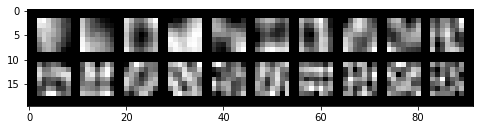

ff
[0.23592387 0.43289166 0.57564743 0.67068221 0.7386532  0.80348076
 0.86296576 0.90767222 0.94308838 0.97109409 0.9868575  0.9929164
 0.99840762 0.99960371 1.         1.        ]


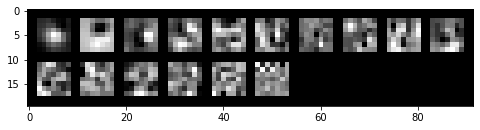

80 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se1 0.6380768451708512
lateral
[0.19232657 0.33866871 0.45685705 0.56382737 0.64041973 0.70174235
 0.7396467  0.77279552 0.799429   0.81624625 0.83162721 0.84674336
 0.86065107 0.86943678 0.87644238 0.88326047 0.88993314 0.89606719
 0.90136691 0.90604017]


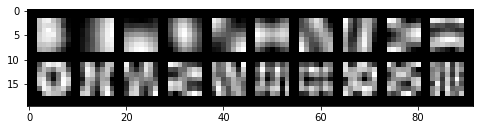

ff
[0.30909296 0.5218545  0.70465035 0.77761479 0.83655865 0.86977773
 0.89956075 0.92786199 0.94465464 0.96112432 0.97293341 0.98300252
 0.98827784 0.99241657 0.99569764 0.99792346 0.99873368 0.99909403
 0.99932213 0.99950154]


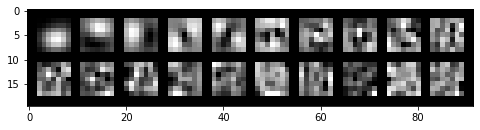

85 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se1 0.6271790585664151
lateral
[0.19924513 0.33914874 0.46209168 0.55473424 0.62041918 0.67789152
 0.71492363 0.74393744 0.76950127 0.78621019 0.80152005 0.81550422
 0.82877977 0.83827658 0.8456543  0.8522552  0.85834185 0.86372441
 0.86885461 0.87278893]


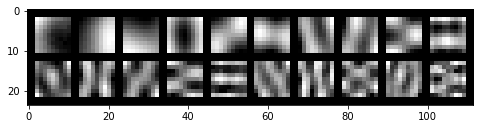

ff
[0.22907    0.42073549 0.57318661 0.66446278 0.75142686 0.8083179
 0.84599825 0.87796289 0.90361241 0.9241532  0.94042839 0.95520793
 0.96795301 0.97793981 0.9844964  0.98879845 0.99252345 0.99514674
 0.99659598 0.9975117 ]


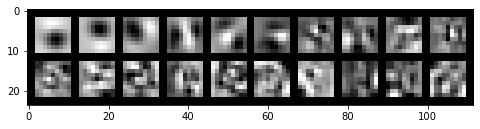

90 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6138220784942777
lateral
[0.14477603 0.26062889 0.35615246 0.43070114 0.49983612 0.55914831
 0.60298091 0.64446929 0.6785395  0.71181153 0.737108   0.76189064
 0.78147041 0.79985802 0.8165149  0.83053167 0.8432184  0.85459908
 0.86536993 0.87441938]


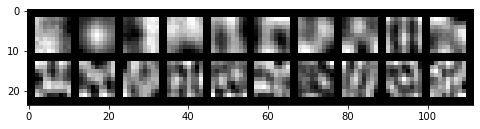

ff
[0.27764505 0.47861288 0.60176161 0.68585598 0.75527687 0.81684949
 0.86177709 0.89979772 0.92984846 0.95155578 0.97108877 0.98372991
 0.99298333 0.99705819 1.         1.        ]


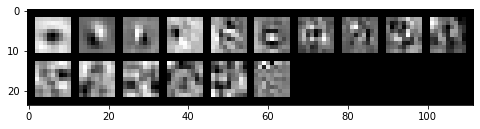

95 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.610581430518609
lateral
[0.12614442 0.22150555 0.30787754 0.38046765 0.4461422  0.50710603
 0.55783652 0.60819485 0.64873661 0.68259412 0.7144242  0.74221425
 0.76829051 0.78779448 0.80484256 0.81956685 0.83352003 0.84689864
 0.85828469 0.86716418]


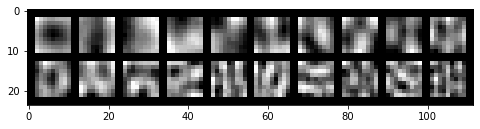

ff
[0.23892768 0.4298776  0.58561489 0.70317483 0.77938501 0.83681319
 0.88397211 0.92397254 0.95411015 0.97308796 0.98374892 0.98958217
 0.99435765 0.99820732 1.         1.        ]


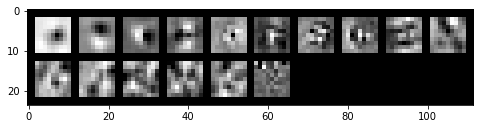

100 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6478482086325591
lateral
[0.22725196 0.36957044 0.48128121 0.58092068 0.64042524 0.69556787
 0.72976213 0.75933526 0.7834209  0.80175399 0.81823107 0.83274994
 0.8455389  0.85424816 0.86190688 0.86861171 0.87489684 0.88110565
 0.88628873 0.89112788]


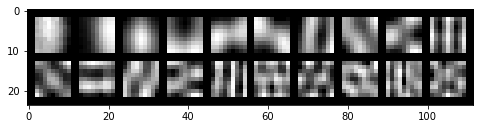

ff
[0.24271302 0.42593979 0.55985353 0.66875977 0.73184474 0.78727402
 0.83314393 0.86757998 0.89612664 0.91801588 0.9382439  0.95481476
 0.96829052 0.97705608 0.98291696 0.98747043 0.99133179 0.99414912
 0.99584182 0.99694054]


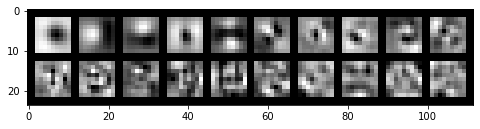

105 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.6711386063379722
lateral
[0.2240848  0.38404995 0.52782795 0.61890198 0.69816311 0.76734591
 0.80127154 0.83356201 0.86235662 0.87971891 0.89358435 0.90574317
 0.91686574 0.92558871 0.9306357  0.93538661 0.93973031 0.94398316
 0.94754891 0.95082749]


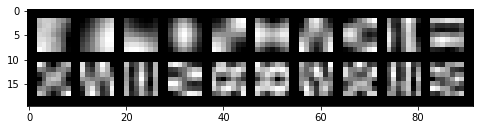

ff
[0.30946982 0.52769801 0.6983482  0.79098813 0.84755613 0.88780448
 0.91320349 0.93527458 0.95404504 0.97119755 0.98370139 0.99133912
 0.99416893 0.9965762  0.99778648 0.99852979 0.99898008 0.99931493
 0.99952081 0.99967897]


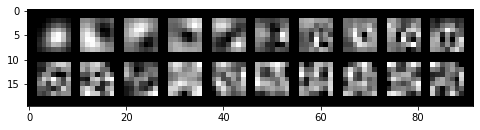

110 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se1 0.6144198787220887
lateral
[0.1863941  0.310232   0.4034365  0.47198042 0.53143647 0.58946872
 0.63393746 0.67266593 0.70553448 0.73656986 0.76294664 0.78861675
 0.81239461 0.83085938 0.84627888 0.86088851 0.87441721 0.88543462
 0.89454216 0.90329408]


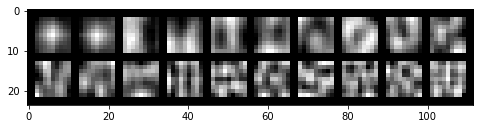

ff
[0.34309892 0.50563731 0.63541105 0.71419981 0.77471736 0.8331428
 0.87628311 0.91069863 0.93998958 0.96357135 0.97532266 0.98400842
 0.99143595 0.99724799 1.         1.        ]


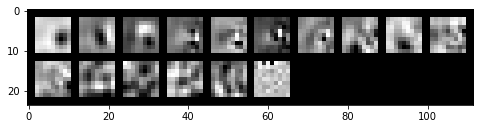

115 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se1 0.6192267412040522
lateral
[0.13461332 0.25855495 0.34291959 0.42042484 0.48787357 0.53948429
 0.58867658 0.62782322 0.66540917 0.69500783 0.72230982 0.74660718
 0.76834284 0.78674126 0.80498272 0.8204511  0.83446884 0.84651779
 0.85770521 0.86778761]


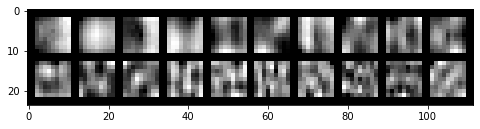

ff
[0.27464971 0.4255185  0.55013936 0.65327192 0.74561418 0.81970996
 0.87718284 0.91240676 0.93851579 0.96119831 0.97751284 0.98661861
 0.99342993 0.99815658 1.         1.        ]


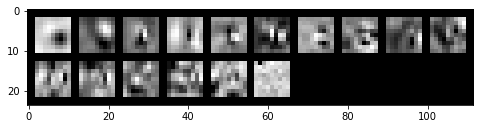

120 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se1 0.6194875978063152
lateral
[0.20570803 0.33885248 0.45780921 0.56184954 0.62231321 0.67209479
 0.71743158 0.7503604  0.7803821  0.80421069 0.8230785  0.84077083
 0.85592141 0.8657319  0.87349559 0.88071113 0.88760823 0.89297308
 0.89800536 0.90273398]


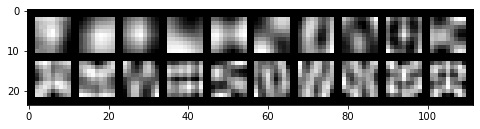

ff
[0.32925853 0.52812342 0.68185652 0.76452926 0.81914376 0.8618918
 0.89490869 0.92212306 0.94242906 0.95716287 0.96729205 0.97647099
 0.98298238 0.98886227 0.99244192 0.99503046 0.99695339 0.99804608
 0.99867213 0.99915609]


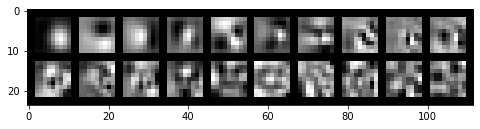

125 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6365594725237338
lateral
[0.20560917 0.36848409 0.47226979 0.55482787 0.6162819  0.66744713
 0.71119439 0.74632894 0.77617034 0.8030764  0.82601496 0.84484425
 0.86223156 0.8755828  0.88704015 0.89840483 0.90851579 0.91771546
 0.92499044 0.93202554]


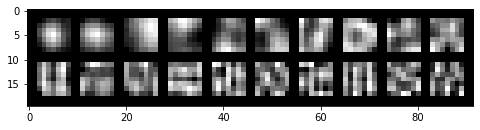

ff
[0.24342219 0.45607361 0.59786139 0.70093995 0.77397054 0.82784154
 0.8736856  0.91433206 0.94294821 0.96229342 0.98011396 0.99017982
 0.99688618 0.99905207 1.         1.        ]


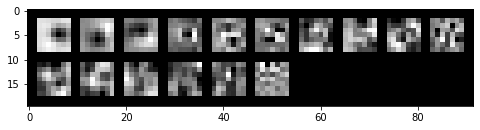

130 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.6356795846772932
lateral
[0.19398391 0.33325809 0.45530666 0.53944066 0.6145201  0.66412148
 0.70502453 0.73684031 0.76661435 0.79219755 0.81516988 0.83313808
 0.84871209 0.86301469 0.87454363 0.88452648 0.89425123 0.90247439
 0.90973501 0.91669152]


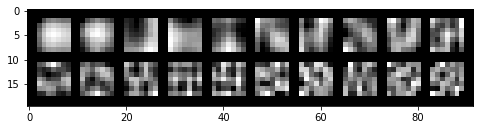

ff
[0.272205   0.48001584 0.64785631 0.73754044 0.81171375 0.87925983
 0.93399703 0.95609413 0.97464141 0.98647727 0.99364786 0.99823484
 0.99957426 0.9999024  1.         1.        ]


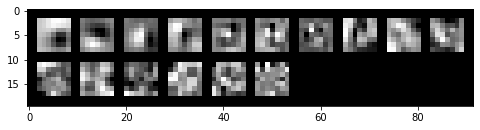

135 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6743434721290649
lateral
[0.24939827 0.3839     0.50125771 0.59639484 0.66306809 0.71458149
 0.75358072 0.78129952 0.80721387 0.83062452 0.84838199 0.86489908
 0.87693434 0.88686579 0.89503113 0.90259479 0.90989246 0.91588242
 0.92131794 0.92639382]


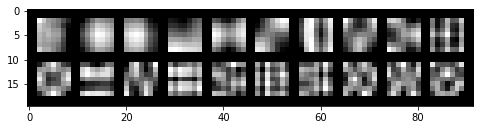

ff
[0.43726028 0.61071305 0.75962991 0.81973599 0.85737334 0.89372702
 0.91833019 0.94083923 0.9559141  0.96946474 0.98160507 0.98914319
 0.99368447 0.99665969 0.99847643 0.99907462 0.99950699 0.99973178
 0.9998625  0.9999319 ]


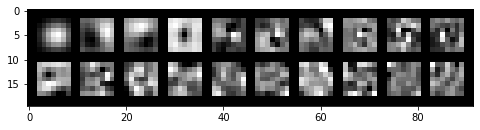

140 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.681921553743287
lateral
[0.19085232 0.33424397 0.45651658 0.56484569 0.63300463 0.6931651
 0.73774648 0.77318975 0.79807216 0.81977185 0.83984635 0.85704483
 0.8725559  0.88261053 0.89174073 0.89901545 0.90579566 0.91222556
 0.91783961 0.92317609]


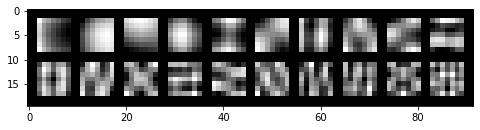

ff
[0.43626612 0.60528524 0.74220888 0.80542428 0.85103892 0.89230749
 0.91922545 0.9412443  0.95901842 0.972973   0.98460547 0.99233727
 0.99535137 0.9976063  0.99883706 0.99928613 0.99956184 0.99982605
 0.99993219 0.99995642]


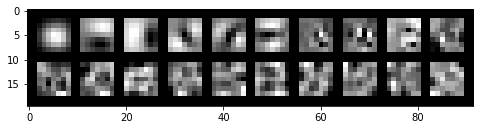

143


In [13]:
collect_all({4})

5 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se0 0.615150180200496
lateral
[0.13885249 0.26639315 0.37047221 0.45274183 0.52175852 0.58410582
 0.64138242 0.68867673 0.72391659 0.75461134 0.78187227 0.80224794
 0.82236546 0.83837352 0.85231109 0.86379106 0.87472921 0.8843797
 0.8936917  0.90264222]


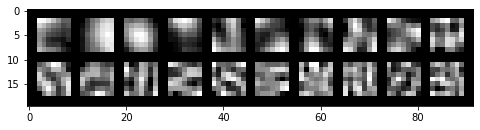

ff
[0.2815738  0.51258824 0.64352846 0.72795055 0.80334358 0.86410935
 0.91019562 0.95071865 0.9684991  0.98133439 0.98846404 0.99463554
 0.99759081 0.99950616 1.         1.        ]


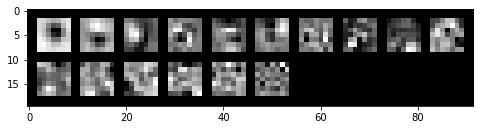

10 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se0 0.6422849788211902
lateral
[0.19576539 0.3325703  0.44363616 0.539132   0.60377233 0.66514019
 0.70075906 0.73220892 0.76017628 0.77651086 0.79202445 0.80697987
 0.8210198  0.8304064  0.83884997 0.84703287 0.85506713 0.86243648
 0.86898965 0.87544707]


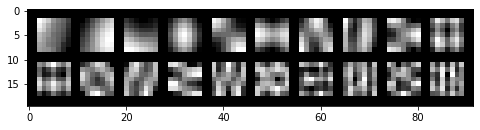

ff
[0.29234651 0.47147907 0.6399928  0.73008506 0.80206097 0.85397035
 0.88645125 0.91508715 0.9362823  0.9509526  0.9631316  0.97416273
 0.98191638 0.98835974 0.99190651 0.99429784 0.99659233 0.99816049
 0.99917783 0.99943883]


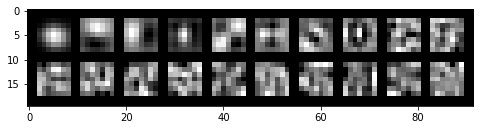

15 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se0 0.6424241940379255
lateral
[0.16737506 0.29505192 0.4048869  0.49021334 0.5652642  0.62274156
 0.66619834 0.70563337 0.73901487 0.76196989 0.78243126 0.80260913
 0.82135863 0.83345242 0.84406157 0.85313057 0.86149178 0.86891051
 0.87610681 0.88191951]


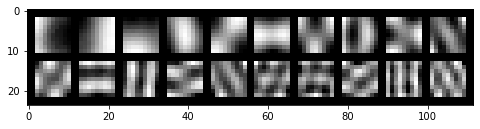

ff
[0.23299519 0.3954437  0.5076087  0.60035274 0.68684647 0.75565823
 0.79910594 0.83778863 0.86843301 0.89399529 0.91535729 0.93356952
 0.94929504 0.96113771 0.97038978 0.97827505 0.98412031 0.98848248
 0.99188333 0.99414547]


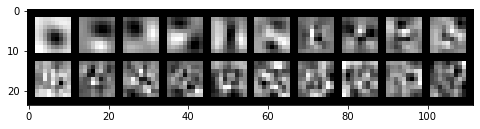

20 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.6281755867552532
lateral
[0.10852421 0.20355141 0.29043254 0.36309866 0.42223469 0.475077
 0.52502428 0.56627324 0.60564326 0.6429748  0.67796074 0.71027504
 0.73790051 0.75994866 0.7814482  0.79818894 0.81393131 0.82825872
 0.84127346 0.85363841]


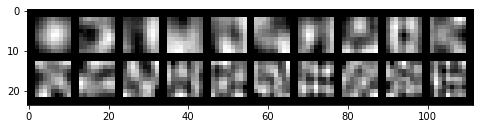

ff
[0.23222265 0.40891424 0.56827909 0.65645698 0.73236322 0.79944464
 0.85098564 0.88994897 0.92059982 0.94960513 0.96667977 0.97783369
 0.9872462  0.99517977 1.         1.        ]


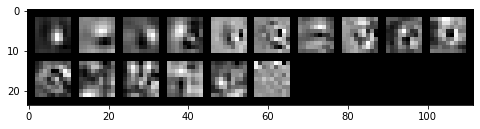

25 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l113/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6252533329203376
lateral
[0.2117589  0.34048087 0.44393006 0.51764936 0.57610252 0.62110796
 0.66263008 0.69301317 0.72178333 0.74739199 0.7682546  0.78584045
 0.80101989 0.81424231 0.82594362 0.83650308 0.84646534 0.85582493
 0.864116   0.87090226]


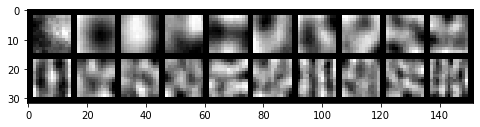

ff
[0.26703453 0.43319868 0.55815607 0.6690117  0.74856709 0.81510321
 0.8637031  0.89793083 0.92544342 0.94883367 0.96914565 0.97972821
 0.99000376 0.99550729 1.         1.        ]


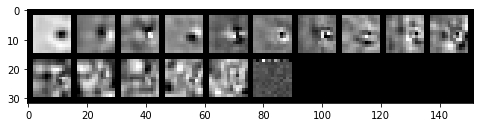

30 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l113/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6199922723110431
lateral
[0.13698801 0.24556686 0.33485431 0.41572657 0.485631   0.54644317
 0.59244284 0.63634347 0.67547987 0.7048992  0.72939113 0.75224475
 0.77479691 0.79116697 0.80587607 0.8187998  0.83100764 0.84236351
 0.85279673 0.86031636]


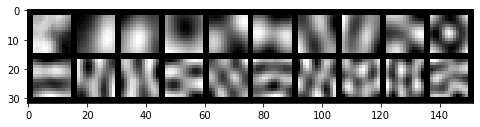

ff
[0.21140212 0.34379554 0.44318838 0.51663826 0.58301498 0.64116077
 0.68815147 0.73272332 0.77175927 0.80791505 0.83470318 0.85653925
 0.87710645 0.89657189 0.91367223 0.92892708 0.94154139 0.95162625
 0.96049676 0.96815391]


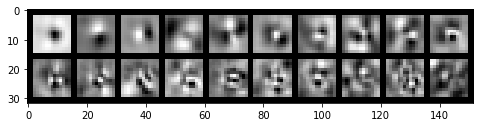

35 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.6263288675690858
lateral
[0.21168108 0.34475421 0.45226054 0.54720097 0.61066136 0.67075681
 0.70451926 0.73365622 0.75942815 0.77730845 0.79263305 0.80649616
 0.81845119 0.82811881 0.8356289  0.84228979 0.84820987 0.85380271
 0.85916202 0.86354407]


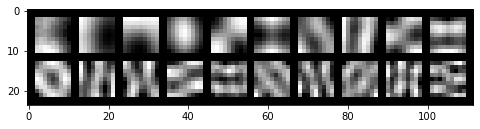

ff
[0.2514711  0.41080645 0.54200186 0.64298364 0.73127869 0.79235721
 0.83264518 0.86852974 0.89799874 0.91955036 0.93726526 0.95183125
 0.96226833 0.9719136  0.9794592  0.98582884 0.99032871 0.99346824
 0.99579987 0.99754394]


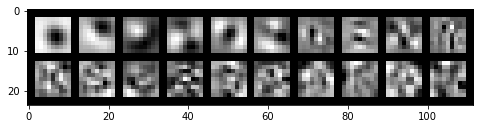

40 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se0 0.6153647431105261
lateral
[0.15221211 0.26121588 0.35868311 0.42404748 0.48688512 0.54195443
 0.59209454 0.63339799 0.67009348 0.7055987  0.73655851 0.76404495
 0.78437697 0.80149399 0.81824372 0.83431577 0.84862287 0.86202347
 0.87437736 0.8855023 ]


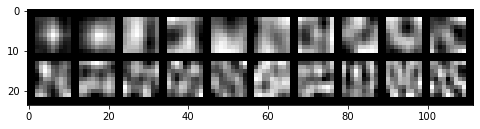

ff
[0.26146618 0.4658559  0.57812088 0.67469259 0.76022239 0.81699489
 0.86944592 0.91406198 0.94285068 0.96169378 0.97293339 0.98306961
 0.99147571 0.99651839 1.         1.        ]


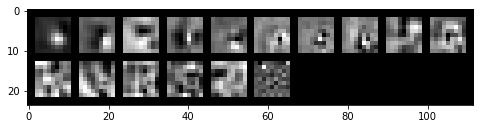

45 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se0 0.6572919323153594
lateral
[0.23321662 0.37820075 0.48984739 0.58658266 0.65180844 0.71024254
 0.74857707 0.78294076 0.81273539 0.83697056 0.85578573 0.87252683
 0.88603    0.89673555 0.90465016 0.91211647 0.91874411 0.92524241
 0.93097872 0.93547193]


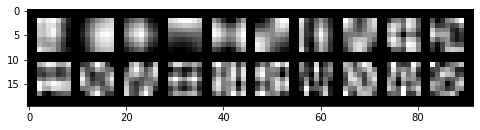

ff
[0.31879871 0.52670333 0.70150659 0.7855401  0.8381783  0.88346729
 0.91437373 0.93621316 0.9578071  0.96965356 0.97885832 0.9856242
 0.99104871 0.99517269 0.99746632 0.99836509 0.99888561 0.99924029
 0.99944801 0.99964839]


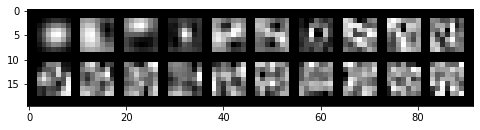

50 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se0 0.6613858803688057
lateral
[0.19314773 0.33840701 0.46209103 0.56598171 0.63766464 0.70380764
 0.74670074 0.78183069 0.81007822 0.83547885 0.8552464  0.87099172
 0.8864502  0.89573071 0.90460733 0.91122078 0.91754399 0.92355633
 0.92849079 0.93285619]


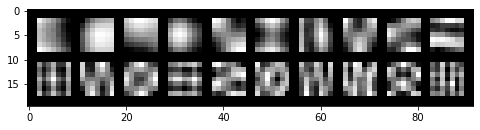

ff
[0.38132201 0.59044157 0.75378772 0.81602037 0.86784124 0.90023662
 0.92448384 0.94550817 0.96336756 0.97312474 0.9811424  0.98741205
 0.99271793 0.99572466 0.99782526 0.99917418 0.99949408 0.99967646
 0.99979697 0.99986182]


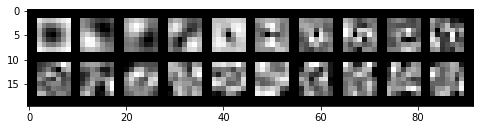

55 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.6386814430181561
lateral
[0.19640856 0.37020609 0.46933072 0.54571227 0.61456317 0.66959761
 0.71185784 0.7412069  0.76970497 0.79694685 0.81881033 0.83668915
 0.85177286 0.86582943 0.87899133 0.89035    0.89979072 0.90904606
 0.91715543 0.92484019]


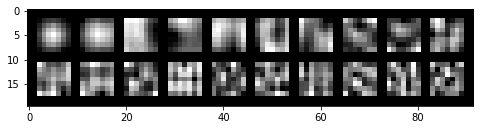

ff
[0.25209534 0.48205036 0.64432953 0.790602   0.86115301 0.90806472
 0.93740177 0.95664858 0.97288313 0.98504621 0.99113469 0.99535057
 0.99805922 0.99939196 1.         1.        ]


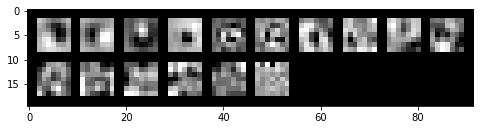

60 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.657916093369325
lateral
[0.15248551 0.29814152 0.39908774 0.4866973  0.56076574 0.62105613
 0.67283182 0.71332387 0.75002175 0.78314814 0.8106248  0.83658196
 0.8541611  0.8686839  0.88142926 0.89356164 0.9036402  0.91269866
 0.92078941 0.92790802]


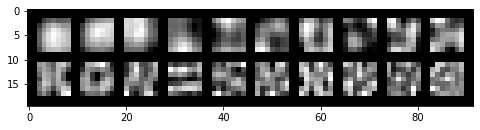

ff
[0.31393946 0.51723274 0.6423196  0.75000786 0.82168252 0.88331161
 0.91878848 0.95117963 0.97108945 0.98625276 0.99331777 0.99797249
 0.99970564 0.99994799 1.         1.        ]


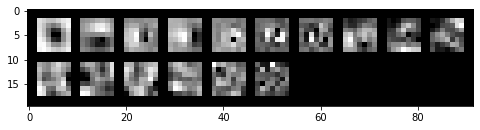

65 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6627620012349115
lateral
[0.24021235 0.37646627 0.49729627 0.58324939 0.65229737 0.69673841
 0.73339119 0.75927001 0.78229725 0.80388259 0.82152842 0.83644142
 0.84761133 0.8581661  0.86729666 0.87558776 0.8827522  0.88878349
 0.89455212 0.89997349]


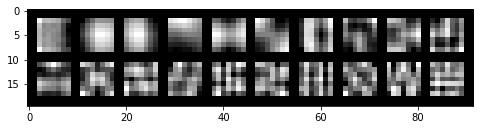

ff
[0.36129014 0.56241048 0.72570781 0.8120001  0.85638134 0.89399308
 0.91997061 0.94275528 0.95966276 0.97162885 0.98300299 0.98861328
 0.99309324 0.99567078 0.99741456 0.99842853 0.99920218 0.99964063
 0.99984002 0.99990557]


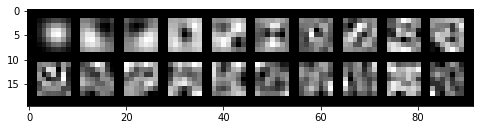

70 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l113/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se0 0.6133752389660961
lateral
[0.1465432  0.25231947 0.33656754 0.41713067 0.47256594 0.52462591
 0.56868227 0.60842321 0.64276185 0.67335856 0.70190548 0.72646651
 0.74874668 0.76505304 0.780216   0.79399453 0.80726664 0.81998669
 0.83075721 0.84080239]


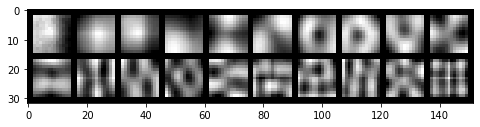

ff
[0.23413604 0.3634294  0.47102845 0.54924418 0.61407609 0.67203835
 0.72020214 0.76188211 0.79916125 0.83194891 0.8618054  0.88436815
 0.90585846 0.92363039 0.93759736 0.95012089 0.96043664 0.96707611
 0.97309132 0.9789754 ]


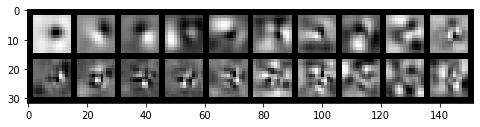

75 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l113/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se0 0.6253749786617422
lateral
[0.16431191 0.28531997 0.37004213 0.45132342 0.51048491 0.56437706
 0.60576872 0.64192988 0.67298139 0.69960033 0.7259452  0.74696241
 0.76318235 0.77892186 0.79253726 0.80473708 0.8148193  0.82453553
 0.83339432 0.8412906 ]


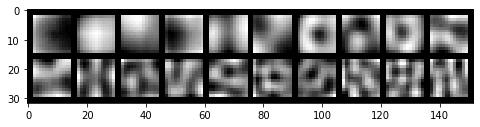

ff
[0.28823742 0.44387637 0.53403793 0.60987234 0.67375196 0.72272275
 0.76506121 0.80213491 0.8380716  0.86854338 0.89204505 0.91077935
 0.92623533 0.94136865 0.95286724 0.96406843 0.97383734 0.98087296
 0.98529734 0.98872232]


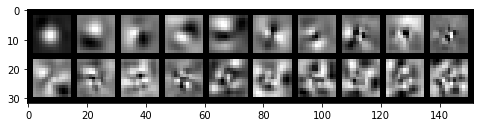

80 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se1 0.626683377837247
lateral
[0.14712946 0.26441132 0.36986953 0.47026078 0.54230937 0.6039103
 0.65724777 0.7019634  0.73737921 0.76862275 0.79307627 0.81663798
 0.83818176 0.85285059 0.86604124 0.87839757 0.89040552 0.90059959
 0.90864763 0.91552972]


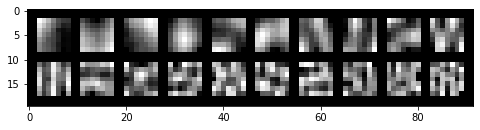

ff
[0.22364602 0.39572305 0.53629089 0.64355434 0.73474086 0.79642439
 0.8516437  0.8974702  0.9365268  0.96063722 0.97928272 0.99044146
 0.99534668 0.99915529 1.         1.        ]


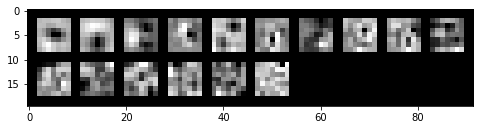

85 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se1 0.6574963263505688
lateral
[0.17709322 0.31496066 0.42900035 0.53175709 0.60889053 0.67508714
 0.71609417 0.74928935 0.77824899 0.79526738 0.81180876 0.8278074
 0.84289819 0.85232522 0.86022174 0.86759551 0.87485086 0.88162043
 0.88754372 0.89310735]


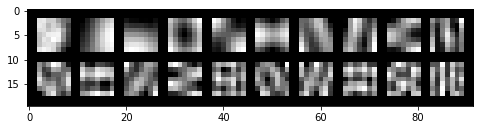

ff
[0.32376037 0.50697509 0.66141394 0.75113521 0.82102198 0.86629941
 0.89788144 0.92468762 0.94217165 0.95895917 0.97189868 0.98205315
 0.98736814 0.99218153 0.99505977 0.99656877 0.99785529 0.99853533
 0.99906675 0.99936306]


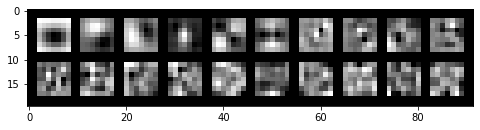

90 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se1 0.6231210898493135
lateral
[0.18208276 0.30693169 0.41545268 0.50774946 0.57676685 0.64093637
 0.68137287 0.71629361 0.74723912 0.76605026 0.78328344 0.79903486
 0.81337585 0.82515144 0.83300215 0.84058271 0.84754031 0.85408369
 0.86017087 0.86515416]


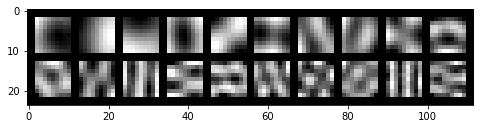

ff
[0.23919654 0.41108301 0.55212264 0.64632621 0.7263036  0.79849134
 0.83792065 0.87191022 0.90088282 0.92172675 0.94001952 0.95637114
 0.96742257 0.97716261 0.98363733 0.98863387 0.99224037 0.99412921
 0.9958064  0.99705318]


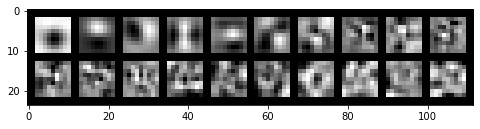

95 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.6189378195830957
lateral
[0.16032093 0.29297869 0.39218722 0.47287113 0.53059134 0.58762858
 0.63715842 0.68353211 0.72108855 0.75645827 0.78382913 0.80550022
 0.8259567  0.8418788  0.8568893  0.86923198 0.88118307 0.89080177
 0.89968179 0.90643697]


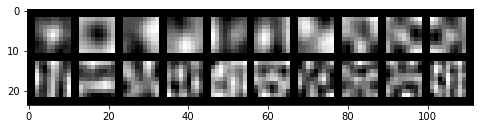

ff
[0.27216828 0.48621128 0.60996865 0.70188489 0.7731442  0.83243792
 0.87853712 0.91243889 0.93748912 0.95881526 0.97117385 0.98177995
 0.99105603 0.99693776 1.         1.        ]


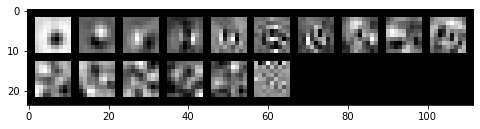

100 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l113/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6191883713866042
lateral
[0.13449855 0.23223926 0.32131281 0.39235219 0.4561189  0.51148787
 0.554246   0.59332857 0.62983733 0.66196291 0.69024694 0.71567969
 0.73844809 0.75791055 0.77617947 0.79416607 0.81109212 0.82420918
 0.83633386 0.84670544]


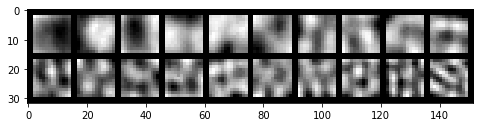

ff
[0.24640276 0.41975151 0.54624717 0.63087498 0.71357454 0.77685194
 0.83206506 0.88139983 0.91287104 0.93786273 0.95959655 0.97228965
 0.98410692 0.99290347 1.         1.        ]


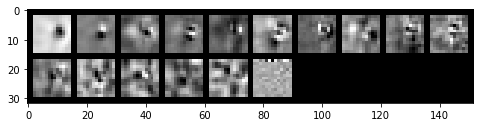

105 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l113/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6077207768842648
lateral
[0.14081029 0.24228343 0.33627885 0.42126291 0.48371318 0.54110195
 0.58491621 0.62353594 0.65809218 0.68724978 0.71351856 0.73690138
 0.75914348 0.77701887 0.79165379 0.80469407 0.81673004 0.82748864
 0.83778742 0.84534318]


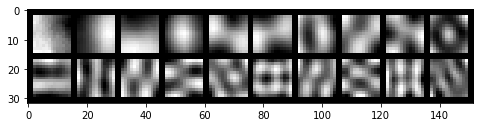

ff
[0.20413137 0.3568423  0.45358763 0.52787247 0.59827766 0.65264146
 0.7022563  0.7477233  0.79217179 0.82565812 0.84902414 0.86897018
 0.88798769 0.90528884 0.91986683 0.93333061 0.94438403 0.9547222
 0.96301841 0.97004331]


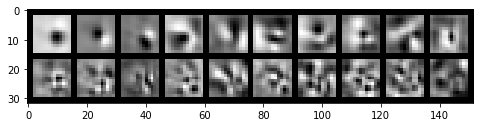

110 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.6549592586502287
lateral
[0.21051671 0.3534984  0.46418586 0.55908902 0.6188325  0.6758767
 0.70984777 0.74033558 0.76544235 0.78311245 0.79908989 0.81469996
 0.82928933 0.83904748 0.84712295 0.85483822 0.86187716 0.86844464
 0.87466731 0.87949383]


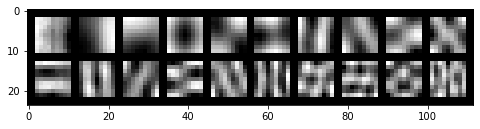

ff
[0.25875664 0.42493587 0.56919948 0.66745208 0.75580965 0.80722213
 0.84279218 0.87484436 0.89917041 0.91993803 0.93742209 0.95308829
 0.96404834 0.97296177 0.97967975 0.98621738 0.99055164 0.99403115
 0.99564565 0.99713157]


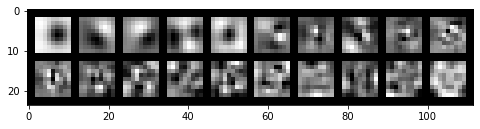

115 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se1 0.6084977658771845
lateral
[0.14196586 0.24123036 0.32790895 0.39206292 0.44941326 0.50075684
 0.55086468 0.59116403 0.62900314 0.66382355 0.69377576 0.72240993
 0.74932216 0.77328322 0.79474433 0.81300186 0.8286314  0.84322687
 0.85760329 0.86985337]


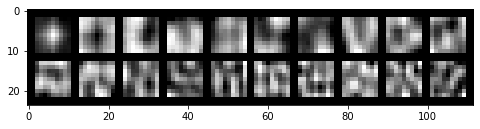

ff
[0.28420768 0.44682767 0.58418904 0.6817588  0.75941226 0.81741886
 0.8698188  0.91989485 0.94802327 0.96510352 0.97756173 0.98719132
 0.99411579 0.99798055 1.         1.        ]


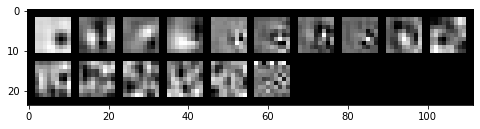

120 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lmse/m_se1 0.6559304765276396
lateral
[0.24450346 0.39082878 0.51288302 0.59800016 0.66461534 0.71739434
 0.7553638  0.78403474 0.80981866 0.83387423 0.84969022 0.86500765
 0.87761431 0.88748373 0.89528549 0.90232303 0.908631   0.9144059
 0.91940532 0.9238484 ]


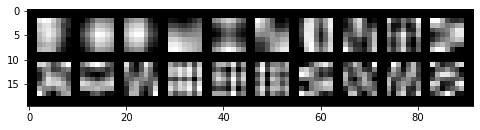

ff
[0.37260006 0.57251297 0.72626227 0.79588587 0.84195019 0.88107227
 0.90766704 0.92935753 0.9489368  0.96509311 0.97785661 0.98653705
 0.99284238 0.99585265 0.99723103 0.99853522 0.99907209 0.9993885
 0.99962408 0.9997923 ]


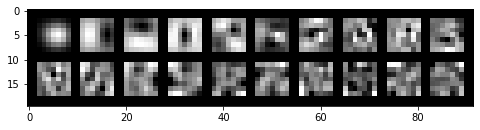

125 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lmse/m_se1 0.65806485328702
lateral
[0.19635026 0.34865499 0.46300929 0.56132337 0.63117469 0.69821787
 0.74013827 0.7780066  0.80603187 0.82884402 0.84955806 0.86550823
 0.87999515 0.89099655 0.89954989 0.90659411 0.91352747 0.91931174
 0.92476163 0.92979168]


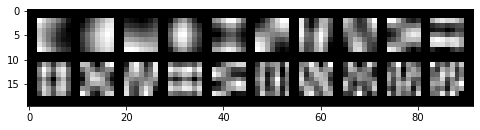

ff
[0.44743128 0.62059776 0.7513324  0.81460052 0.86812018 0.90223936
 0.93244311 0.95433037 0.971434   0.98382795 0.9915161  0.99471661
 0.99670845 0.99850021 0.99908522 0.99949359 0.99966216 0.99979374
 0.99990368 0.99993287]


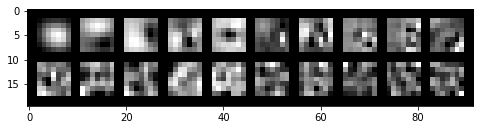

130 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.6302903522241301
lateral
[0.22952787 0.40864845 0.49040164 0.56628276 0.63199184 0.6767564
 0.71468818 0.74702901 0.77730336 0.80229098 0.82085552 0.8375285
 0.85206664 0.86611422 0.87790225 0.88898368 0.89836016 0.90616428
 0.91341791 0.92042432]


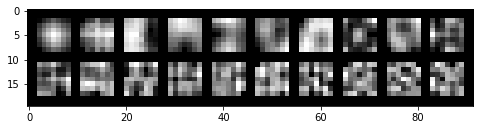

ff
[0.31104923 0.51418619 0.62269838 0.71299994 0.79306223 0.84832267
 0.88970737 0.92738609 0.95747417 0.97982849 0.9908058  0.99693996
 0.99843342 0.99931127 1.         1.        ]


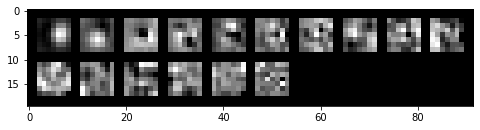

135 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.6584961892170429
lateral
[0.15395641 0.29907928 0.39662359 0.48323391 0.55607864 0.60738924
 0.6539414  0.69931883 0.73498659 0.76710157 0.79554837 0.81843667
 0.83726296 0.85487815 0.8696245  0.88224928 0.89302938 0.90369509
 0.9131559  0.92151983]


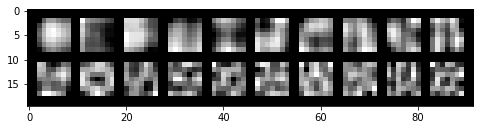

ff
[0.27946609 0.49279019 0.65094962 0.7516524  0.82046418 0.87547198
 0.92618524 0.95518438 0.97319455 0.98868705 0.99539573 0.99779354
 0.99922731 0.99977621 1.         1.        ]


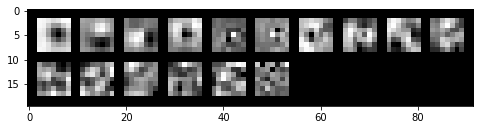

140 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l17/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6801429327385679
lateral
[0.23161395 0.36053309 0.46743398 0.5639748  0.6371593  0.69567677
 0.73576164 0.76913537 0.80025444 0.82390391 0.84491042 0.86459217
 0.87850056 0.89037851 0.90106267 0.90940416 0.91691714 0.92404687
 0.93019361 0.93592645]


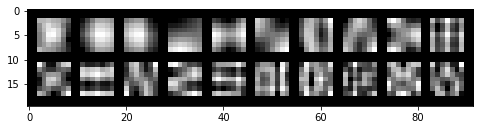

ff
[0.40092393 0.58863704 0.72704953 0.79809741 0.84079834 0.87599284
 0.90264179 0.92442364 0.94434767 0.96100823 0.97443635 0.98305341
 0.98933612 0.99406205 0.99653267 0.99817942 0.99891171 0.99929013
 0.99956178 0.99975375]


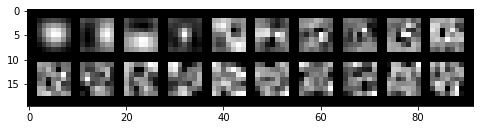

145 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l2/k_l113/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_accinstant/sc0.01/sm0.000005/lpoisson/m_se1 0.6064320393854593
lateral
[0.16418617 0.26628857 0.35456998 0.43715192 0.49808105 0.54860188
 0.59310162 0.63028306 0.66459708 0.69120948 0.71595031 0.73881309
 0.7586135  0.77319725 0.78684039 0.79968495 0.81158167 0.8222218
 0.83223858 0.84093975]


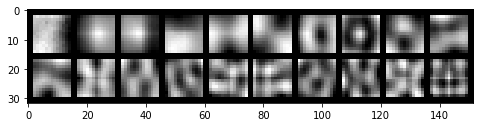

ff
[0.25076542 0.38512806 0.50277441 0.58872195 0.65653092 0.70818853
 0.75893569 0.80024564 0.83422768 0.85969536 0.88341448 0.90159271
 0.91800299 0.93376564 0.94668258 0.95703295 0.96588374 0.97316736
 0.97876476 0.98323626]


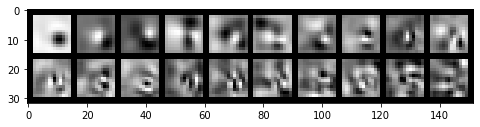

150 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch48/num_l3/k_l113/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/sc0.01/sm0.000005/lpoisson/m_se1 0.6340603437225522
lateral
[0.1130539  0.21453801 0.30293945 0.38672925 0.44592846 0.50147267
 0.54963233 0.59047789 0.62603661 0.66013426 0.68847091 0.71529545
 0.73901632 0.75845956 0.77667033 0.79182801 0.8059318  0.81888543
 0.83096269 0.83974037]


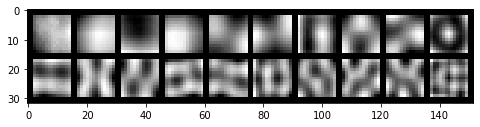

ff
[0.24123131 0.38987964 0.50008402 0.58297922 0.64530507 0.69637515
 0.74219339 0.77839736 0.80952258 0.83876711 0.86244001 0.8854124
 0.90660657 0.92291536 0.93756739 0.94934379 0.95889119 0.9672467
 0.97457354 0.98036706]


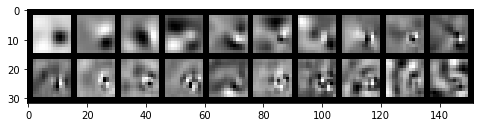

151


In [14]:
collect_all({3})